# The Tesla stock and the tech sector

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `dataproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [1]:
import pandas as pd
import numpy as np
import ipywidgets as widgets
from matplotlib_venn import venn2
from matplotlib.pyplot import figure

#Import table functions
import pandas.io.formats.style as style
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from tabulate import tabulate

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# user written modules
import dataproject


# Import alle neccesarry data used in the project

We are importing all neccesarry data, which we are gonna use throughout the data project. 

In [2]:
#Import all neccesarry data files inCSV format

AAPL_data = pd.read_csv('AAPL.csv', sep=',')  
AMZN_data = pd.read_csv('AMZN.csv', sep=',')   
IBM_data = pd.read_csv('IBM.csv', sep=',')  
INTC_data = pd.read_csv('INTC.csv', sep=',')  
MSFT_data = pd.read_csv('MSFT.csv', sep=',')  


## Apple stock showing yearly prices and volume

In [ ]:
#1: TABLE OVER APPLE STOCK SHOWING yearly prices and volume from 31 dec. 2000 to 31 dec. 2022

# Convert the 'Date' column to datetime format
AAPL_data['Date'] = pd.to_datetime(AAPL_data['Date'])

# Filter the data for the past two years
AAPL_yearly__data = AAPL_data[AAPL_data['Date'] >= '2000-01-01']

# Create a new DataFrame with only the desired columns
AAPL_table = AAPL_yearly__data.iloc[:, [0, 1, 2, 3, 4,6]]

# Look at the data table
AAPL_table

This data set includes 279 different observations, which represents every month from the first of januaray 2000 to the third of januaray 2023. Each month has a opening, highest, lowest, closing and a volume value. 

In [ ]:
#2: Converting the data to yearly data

# Convert the 'Date' column to datetime format and set it as the index
AAPL_data['Date'] = pd.to_datetime(AAPL_data['Date'])
AAPL_data.set_index('Date', inplace=True)

# Resample the data at a yearly frequency thus select the last value of each year
AAPL_yearly_data = AAPL_data.resample('Y').last() #'Y' is a frquency ALIAS for YEAR. The frequency ALIAS for monthly is 'M', daily is 'D'...

# Drop the 'Adj Close' column
AAPL_yearly_data = AAPL_yearly_data.drop(columns=['Adj Close'])

# Reset the index to include the 'Date' column as a regular column
AAPL_yearly_data.reset_index(inplace=True)

# Deleting las row in table output since we don't have data for the whole year of 2023 yet
AAPL_yearly_data=AAPL_yearly_data.iloc[:-1]

#Look at the data
AAPL_yearly_data


The data set is now grouped into years, which means that the data set has 22 rows representing each year from 2000 to 2022. Each year has a opening, highest, lowest, closing and a volume value just as before. 

In [ ]:
#3: Formatting the Data

#Formate the data to only include two decimals i.e 2f
AAPL_yearly_data['Open'] = AAPL_yearly_data['Open'].round(2)
AAPL_yearly_data['High'] = AAPL_yearly_data['High'].round(2)
AAPL_yearly_data['Low'] = AAPL_yearly_data['Low'].round(2)
AAPL_yearly_data['Close'] = AAPL_yearly_data['Close'].round(2)
AAPL_yearly_data['Volume'] = AAPL_yearly_data['Volume'].apply(lambda x: '{:,}'.format(x))

# Renaming the columns
AAPL_yearly_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']

# Table formatting and printing
table = tabulate(AAPL_yearly_data, headers='keys', tablefmt='grid', showindex=False)
print(table)

The table is formated to use the closing date, and we only want to show 2 decimals. 

## Graph illustrating the Apple stock price over time

In order to be able to **explore the raw data**, you may provide **static** and **interactive plots** to show important developments 

In [ ]:
#4: Graph illustrating the APPLE stock price over time using the yearly close price

# Resample again the data at a yearly frequency and select the closing price for each year
AAPL_yearly_close = AAPL_data['Close'].resample('Y').last()

# Use the plot librabry
fig, ax = plt.subplots()
ax.plot(AAPL_yearly_close.index, AAPL_yearly_close.values)

# Format the x-axis labels to show only the year
date_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_fmt)

# Set the axis labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Closing Stock Price ($)')
ax.set_title('Yearly Apple Stock Price')

# Show the plot
plt.show()

It appears from the graph that the closing stock price in dollars has increased since the beginning of our data set in 2000. In particular, there was a significant increase in the closing stock price until 2019. A large part of the stock market's progress in 2019 can be attributed to a dramatic political shitft in the Federal Reserve. The Fed raised rates four times in 2018, including an increase in December 2018. From 2000 to 2019, a continuous increase is seen. 

The closing stock price was around 0 at the end of 2000, which means that there can be either a loss or a profit. In 2019, the value has risen to just under 50 dollars, after which we observe that the closing stock price rises to just above 175 dollars in 2021. From 2021 we observe a slight decrease in 2022 to around 125 dollars. 

The graph indicates that there will be an increase in the closing stock price in the comming years, as the value increases again from 2022 and all the way to the end of out data set in 2024. This might indicate that the closing stock price will continue increasing in the future years. 

In [ ]:
#5: Making the graph more stylish

# Choose a style theme
plt.style.use('seaborn-bright')

# There are many other styles availble that can be found by printing the below
print(plt.style.available)

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8)) #If desired the graph size can be smaller

# Plot the data with a line of a different color and thickness
ax.plot(AAPL_yearly_close.index, AAPL_yearly_close.values, color='#0077C8', linewidth=2)

# Set the background color of the plot area
ax.set_facecolor('#E8E8E8') #Code for dark grey color

# Set the tick label size and color
ax.tick_params(axis='both', which='major', labelsize=12, labelcolor='#666666') #Hex color, respresenting a dark grey color

# Format the x-axis labels to show only the year
date_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_fmt)

# Set the axis labels and title
ax.set_xlabel('Year', fontsize=14, fontweight='bold', color='#666666')
ax.set_ylabel('Closing Stock Price ($)', fontsize=14, fontweight='bold', color='#666666')
ax.set_title('Yearly Apple Stock Price (2000-2022)', fontsize=16, fontweight='bold', color='#333333')

# Add a horizontal grid line and adjust the y-axis limits
ax.grid(axis='y', linestyle='--', color='#999999', alpha=0.5)
ax.set_ylim(bottom=0)

# Add a legend to the plot
ax.legend(['APPL'], loc='upper left', fontsize=12)

# Add annotation to the plot
note = 'Source: Yahoo Finance.'
ax.annotate(note, xy=(0.5, -0.1), xycoords='axes fraction', fontsize=12, ha='center', va='center')

#save the figure as a file in the directory
fig.savefig('apple_stock_price.png', dpi=300)

# Show the plot
plt.show()

This graph is identical to the graph before, where we have simply made the graph itself more presentable. This also means that the conclusion from the previous graph also applies here. We have made some small adjustments and additions so that the plot reflects the evolution of the graph. We have added Source: Yahoo Finance so that it is clear which source the data represented in the graph comes from. In addition, we have chosen a different styling theme, and we have made the graph a specific blue color, and we have changed the thickness of the graph to 2. We have made the background of the graph gray, which matches the gray color that the axis marks have. The y-axis starts at 0, since in this case there are no closing stock values that have a lower value than 0. We have added a market in the left corner that explains what the graph is showing, which in this case is APPL.

# Yearly Apple stock price and volume

In [ ]:
# 6: Making a graph that illustrates the monthly volume on y1 axis and closing price at y2
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8))

AAPL_monthly_volume = AAPL_data['Volume'].resample('M').last() #Not necesaary as data is already monthly data, but just for formality

# Plot the closing price with a line of a different color and thickness
ax.plot(AAPL_monthly_volume.index, AAPL_monthly_volume.values, color='#0077C8', linewidth=2)

# Create a twin axis for the volume data
ax2 = ax.twinx()

# Plot the volume as a bar chart on the twin axis
ax2.plot(AAPL_yearly_close.index, AAPL_yearly_close.values, color='#70B8FF', linewidth=2)

# Set the background color of the plot area
ax.set_facecolor('#E8E8E8')

# Set the tick label size and color
ax.tick_params(axis='both', which='major', labelsize=12, labelcolor='#666666')
ax2.tick_params(axis='both', which='major', labelsize=12, labelcolor='#666666')

# Format the x-axis labels to show only the year
date_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_fmt)
ax2.xaxis.set_major_formatter(date_fmt)

# Set the axis labels and title
ax.set_xlabel('Year', fontsize=14, fontweight='bold', color='#666666')
ax2.set_ylabel('Closing Stock Price ($)', fontsize=14, fontweight='bold', color='#666666')
ax.set_ylabel('Volume', fontsize=14, fontweight='bold', color='#666666')
ax.set_title('Yearly Apple Stock Price (2000-2022)', fontsize=16, fontweight='bold', color='#333333')

# Add a horizontal grid line and adjust the y-axis limits
ax.grid(axis='y', linestyle='--', color='#999999', alpha=0.5)
ax.set_ylim(bottom=0)

# Add a legend to the plot
ax2.legend(['AAPL Close'], loc='upper left', fontsize=12)
ax.legend(['AAPL Volume'], loc='upper right', fontsize=12)

# If desired this can be saved in the directory with the code with the code for the previous figure
plt.show()

The graph above plots the annual stock price for Apple from 2000 to 2022. The x-axis reflects the years from 2000 to 2022, with the first y-axis reflecting volume while the second y-axis reflects the closing stock price in dollars just like the two previous graphs. What is new in this graph compared to the previous two is the volume on the first y-axis. Volume measures the number of shares traded in a stock or contracts traded in futures or options. Volume can indicate market strength, as rising markets with increasing volume are typically considered strong and healthy.

The volume is reflected in the dark blue graph, while the closing stock price is presented in the light blue graph. It is clear in the graph that the value has significantly more fluctuations compared to the closing stock price. This is due, among other things, to the fact that the volume is measured in monthly data, while the closing stock price is on an annual basis. In the graph, you can clearly observe the connection between volume and closing stock price, where an increase in the closing stock price results in a lower volume. If the price of a stock with high trading volume falls, it indicates that there is a lot of selling pressure.

We observe that the volume peaks in 2009 at just over 4, while the closing stock price is around 10 dollars. From there, a significant decrease in volume is seen right up to 2024, while a significant increase in the closing stock price is also observed up to 2024. This clearly reflects the relationship between these two variables. At the end of 2022, volume has fallen to around 0.2, while the closing stock price has risen to around 165 dollars.

# Different stocks in the technology sector

In [ ]:
#7: Compare with other stocks in the same sector

# Convert date column to datetime format and set as index
AAPL_data['Date'] = pd.to_datetime(AAPL_data['Date'])
AAPL_data.set_index('Date', inplace=True)
AMZN_data['Date'] = pd.to_datetime(AMZN_data['Date'])
AMZN_data.set_index('Date', inplace=True)
MSFT_data['Date'] = pd.to_datetime(MSFT_data['Date'])
MSFT_data.set_index('Date', inplace=True)
IBM_data['Date'] = pd.to_datetime(IBM_data['Date'])
IBM_data.set_index('Date', inplace=True)
INTC_data['Date'] = pd.to_datetime(INTC_data['Date'])
INTC_data.set_index('Date', inplace=True)


In [ ]:

# Resample data at a yearly frequency and select the last value of each year (WE illustrate by using dec. 31)
AAPL_yearly_data = AAPL_data.resample('Y').last()['Close']
AMZN_yearly_data = AMZN_data.resample('Y').last()['Close']
MSFT_yearly_data = MSFT_data.resample('Y').last()['Close']
INTC_yearly_data = INTC_data.resample('Y').last()['Close']
IBM_yearly_data = IBM_data.resample('Y').last()['Close']

# Create a plot with multiple lines
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(AAPL_yearly_data.index, AAPL_yearly_data.values, color='#0077C8', linewidth=2, label='Apple')
ax.plot(AMZN_yearly_data.index, AMZN_yearly_data.values, color='#FF9900', linewidth=2, label='Amazon')
ax.plot(MSFT_yearly_data.index, MSFT_yearly_data.values, color='#00CC66', linewidth=2, label='Microsoft')
ax.plot(IBM_yearly_data.index, IBM_yearly_data.values, color='#FFC0CB', linewidth=2, label='IBM')
ax.plot(INTC_yearly_data.index, INTC_yearly_data.values, color='#00FF00', linewidth=2, label='Intel Corporation')

# Set the background color of the plot area
ax.set_facecolor('#E8E8E8')

# Format the x-axis labels to show only the year
date_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_fmt)

# Set the axis labels and title
ax.set_xlabel('Year', fontsize=14, fontweight='bold', color='#666666')
ax.set_ylabel('Closing Stock Price ($)', fontsize=14, fontweight='bold', color='#666666')
ax.set_title('Yearly Stock Prices of Apple, Amazon, Intel, IBM and Microsoft (2000-2022)', fontsize=15, fontweight='bold', color='#333333')

# Add a horizontal grid line and adjust the y-axis limits
ax.grid(axis='y', linestyle='--', color='#999999', alpha=0.5)
ax.set_ylim(bottom=0)

# Add a legend to the plot
ax.legend(loc='upper left', fontsize=12)

# Add annotation to the plot
note = 'Source: Yahoo Finance.'
ax.annotate(note, xy=(0.5, -0.1), xycoords='axes fraction', fontsize=12, ha='center', va='center')

# Show the plot
plt.show()


**Interactive plot** :

In [ ]:
def plot_func():
    # Function that operates on data set
    pass

widgets.interact(plot_func, 
    # Let the widget interact with data through plot_func()    
); 


# Conclusion

ADD CONCISE CONLUSION.

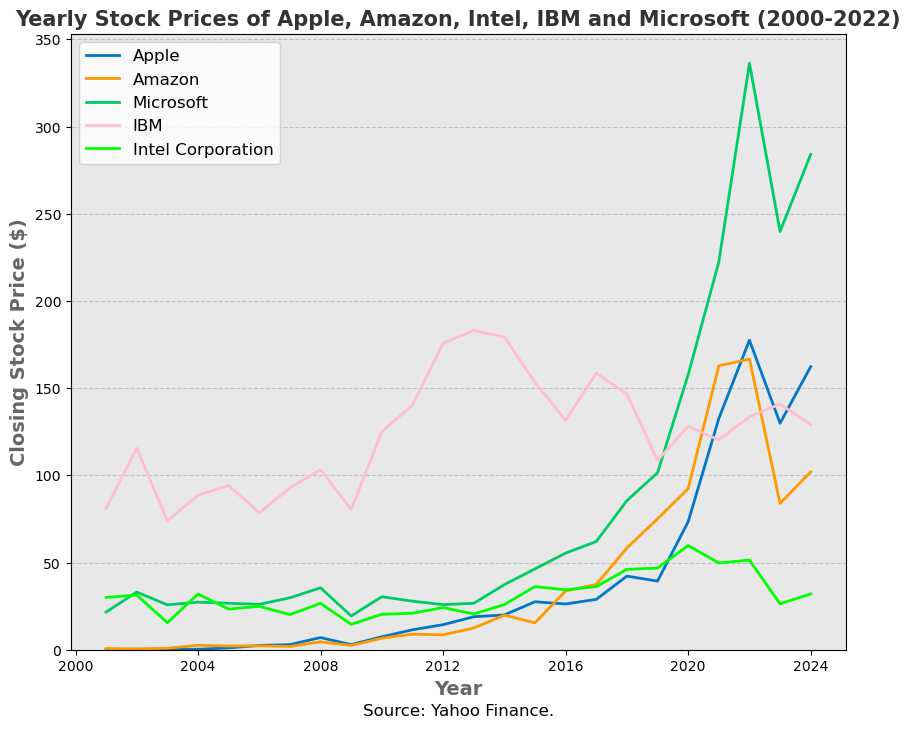

In [3]:
AAPL_data = pd.read_csv('AAPL.csv', sep=',')  
AMZN_data = pd.read_csv('AMZN.csv', sep=',')   
IBM_data = pd.read_csv('IBM.csv', sep=',')  
INTC_data = pd.read_csv('INTC.csv', sep=',')  
MSFT_data = pd.read_csv('MSFT.csv', sep=',')  

# Convert date column to datetime format and set as index
AAPL_data['Date'] = pd.to_datetime(AAPL_data['Date'])
AAPL_data.set_index('Date', inplace=True)
AMZN_data['Date'] = pd.to_datetime(AMZN_data['Date'])
AMZN_data.set_index('Date', inplace=True)
MSFT_data['Date'] = pd.to_datetime(MSFT_data['Date'])
MSFT_data.set_index('Date', inplace=True)
IBM_data['Date'] = pd.to_datetime(IBM_data['Date'])
IBM_data.set_index('Date', inplace=True)
INTC_data['Date'] = pd.to_datetime(INTC_data['Date'])
INTC_data.set_index('Date', inplace=True)

AAPL_yearly_data = AAPL_data.resample('Y').last()['Close']
AMZN_yearly_data = AMZN_data.resample('Y').last()['Close']
MSFT_yearly_data = MSFT_data.resample('Y').last()['Close']
INTC_yearly_data = INTC_data.resample('Y').last()['Close']
IBM_yearly_data = IBM_data.resample('Y').last()['Close']

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(AAPL_yearly_data.index, AAPL_yearly_data.values, color='#0077C8', linewidth=2, label='Apple')
ax.plot(AMZN_yearly_data.index, AMZN_yearly_data.values, color='#FF9900', linewidth=2, label='Amazon')
ax.plot(MSFT_yearly_data.index, MSFT_yearly_data.values, color='#00CC66', linewidth=2, label='Microsoft')
ax.plot(IBM_yearly_data.index, IBM_yearly_data.values, color='#FFC0CB', linewidth=2, label='IBM')
ax.plot(INTC_yearly_data.index, INTC_yearly_data.values, color='#00FF00', linewidth=2, label='Intel Corporation')

# Set the background color of the plot area
ax.set_facecolor('#E8E8E8')

# Format the x-axis labels to show only the year
date_fmt = mdates.DateFormatter('%Y')
ax.xaxis.set_major_formatter(date_fmt)

# Set the axis labels and title
ax.set_xlabel('Year', fontsize=14, fontweight='bold', color='#666666')
ax.set_ylabel('Closing Stock Price ($)', fontsize=14, fontweight='bold', color='#666666')
ax.set_title('Yearly Stock Prices of Apple, Amazon, Intel, IBM and Microsoft (2000-2022)', fontsize=15, fontweight='bold', color='#333333')

# Add a horizontal grid line and adjust the y-axis limits
ax.grid(axis='y', linestyle='--', color='#999999', alpha=0.5)
ax.set_ylim(bottom=0)

# Add a legend to the plot
ax.legend(loc='upper left', fontsize=12)

# Add annotation to the plot
note = 'Source: Yahoo Finance.'
ax.annotate(note, xy=(0.5, -0.1), xycoords='axes fraction', fontsize=12, ha='center', va='center')

# Show the plot
plt.show()